In [192]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


1.Exploratory Data Analysis
Objectif: 1
- Comprendre du mieux possible nos données.
- Développer une premiere stratégie de modélisation

Checklist de Base
Analyse de Forme:
- variable target: Charge
- ligne de colonnes: 7
- ligne de variable 

In [193]:

dataset_path = "Dataset_Brief.csv"
df = pd.read_csv(dataset_path)

In [194]:
# Vérifier les valeurs manquantes
print(df.isnull().sum())

df.describe()

# Supprimer les lignes avec des valeurs manquantes
# df = df.dropna()

# Remplacer les valeurs manquantes par la moyenne
# df['colonne'] = df['colonne'].fillna(df['colonne'].mean())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [195]:
#duplicates
print(df.duplicated().shape[0])
duplicates = df.duplicated()

duplicates_data = df[duplicates]
# "age", "sex", "bmi", "children", "smoker", "region"
print("\nLignes avec des duplicatas:")
print(duplicates_data)
#
df = df.drop_duplicates(subset=["age", "sex", "bmi", "children", "smoker", "region"], keep='first')
#
print("\nAprès vérification de duplicatas:")
print(df.duplicated().shape[0])


1338

Lignes avec des duplicatas:
     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631

Après vérification de duplicatas:
1335


In [196]:
df['age'] = df['age'].astype(int)
df['bmi'] = df['bmi'].astype(float)
df['charges'] = df['charges'].astype(float).round(2)
df['sex'].replace(['male', 'female'], [0,1], inplace=True)
df['smoker'].replace(['no', 'yes'], [0,1], inplace=True)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92
1,18,0,33.770,1,0,southeast,1725.55
2,28,0,33.000,3,0,southeast,4449.46
3,33,0,22.705,0,0,northwest,21984.47
4,32,0,28.880,0,0,northwest,3866.86


In [197]:
df['NordOuest'] = df['region'].str.contains('northwest').astype(int)
df['NordEast'] = df['region'].str.contains('northeast').astype(int)
df['SudOuest'] = df['region'].str.contains('southwest').astype(int)
df['SudEast'] = df['region'].str.contains('southeast').astype(int)
df = df.drop('region', axis=1)

df = df[['age','sex','bmi','children','smoker','NordOuest','NordEast','SudOuest','SudEast','charges']]
# df.head()
df_copie = df.copy()
df_copie.head()
# # Utiliser get_dummies pour créer les colonnes indicatrices
# dummy_cols = pd.get_dummies(df['region'], prefix='region')

# # Concaténer les colonnes indicatrices au dataframe d'origine
# df = pd.concat([df, dummy_cols], axis=1)
# # Supprimer la colonne d'origine si nécessaire
# # df = df.drop('categorique_col', axis=1)

,age,sex,bmi,children,smoker,NordOuest,NordEast,SudOuest,SudEast,charges
0,19,1,27.900,0,1,0,0,1,0,16884.92
1,18,0,33.770,1,0,0,0,0,1,1725.55
2,28,0,33.000,3,0,0,0,0,1,4449.46
3,33,0,22.705,0,0,1,0,0,0,21984.47
4,32,0,28.880,0,0,1,0,0,0,3866.86


In [198]:
# duplicates = df_copie.duplicated(subset=['age','sex','bmi','children','smoker','NordOuest','NordEast','SudOuest','SudEast','charges'])
# duplicates_data = df_copie[duplicates]
# #
# print("\nLignes avec des duplicatas:")
# print(duplicates_data)
# #
# df_copie = df_copie.drop_duplicates(subset=['age','sex','bmi','children','smoker','NordOuest','NordEast','SudOuest','SudEast','charges'], keep='first')
# #
# # print("\nAprès vérification de duplicatas:")
# print(df_copie.head())
# #

smoker
0    1061
1     274
Name: count, dtype: int64


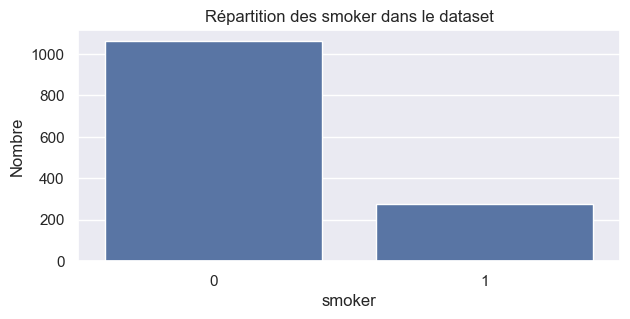

sex
0    675
1    660
Name: count, dtype: int64


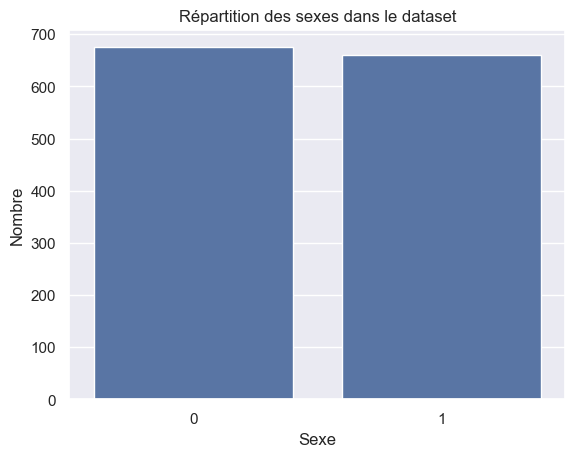

In [199]:
sns.set(style="darkgrid")
plt.figure(figsize=(7, 3))

# Compter le nombre d'hommes et de femmes
sex_counts = df['sex'].value_counts()
# Compter le nombre fumer et non fumer
smoker_counts = df["smoker"].value_counts()

#Tracer le graphique à barres
sns.barplot(x=smoker_counts.index, y=smoker_counts.values)
plt.title('Répartition des smoker dans le dataset')
plt.xlabel('smoker') 
plt.ylabel('Nombre')
print(df['smoker'].value_counts())

# Afficher le graphique
plt.show()

sns.barplot(x=sex_counts.index, y=sex_counts.values)
plt.title('Répartition des sexes dans le dataset')
plt.xlabel('Sexe') 
plt.ylabel('Nombre')
print(df['sex'].value_counts())

# Afficher le graphique
plt.show()

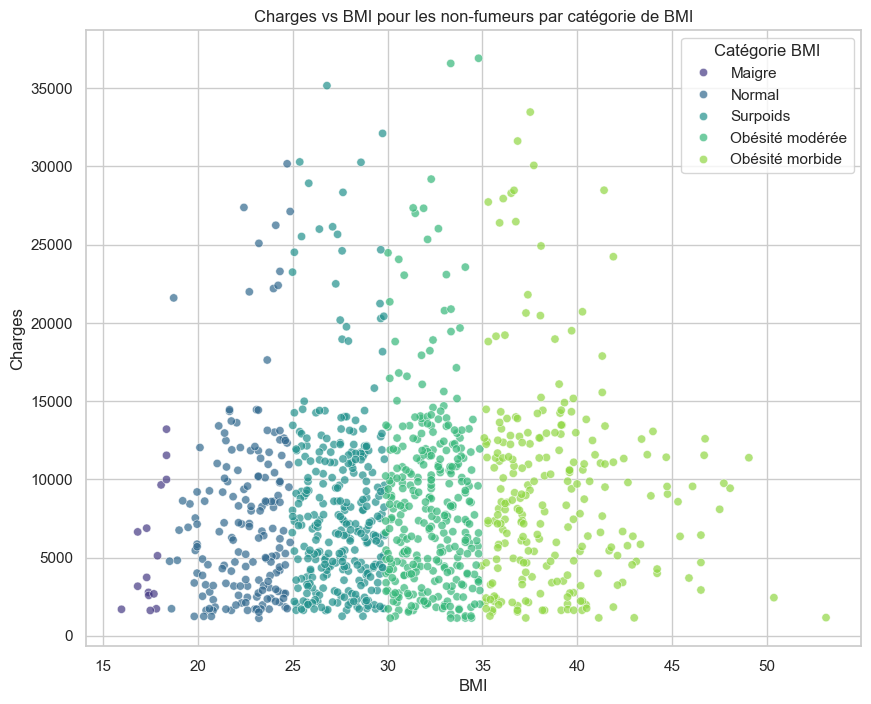

In [200]:
bins = [0, 18.5, 24.9, 29.9, 34.9, 100]
labels = ['Maigre', 'Normal', 'Surpoids', 'Obésité modérée', 'Obésité morbide']

# Ajouter une nouvelle colonne 'bmi_category' avec les catégories définies
df['bmi_category'] = pd.cut(df['bmi'], bins=bins, labels=labels, right=False)

# Filtrer les non-fumeurs (smoker == 0)
non_smokers_df = df[df['smoker'] == 0]

# Créer un graphique de dispersion (scatter plot) avec des couleurs par catégorie de BMI
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))

# Tracer le graphique de dispersion avec des couleurs par catégorie de BMI
sns.scatterplot(x='bmi', y='charges', hue='bmi_category', data=non_smokers_df, alpha=0.7, palette='viridis')

# Ajouter des étiquettes au graphique
plt.title('Charges vs BMI pour les non-fumeurs par catégorie de BMI')
plt.xlabel('BMI')
plt.ylabel('Charges')

# Afficher la légende
plt.legend(title='Catégorie BMI')

# Afficher le graphique
plt.show()

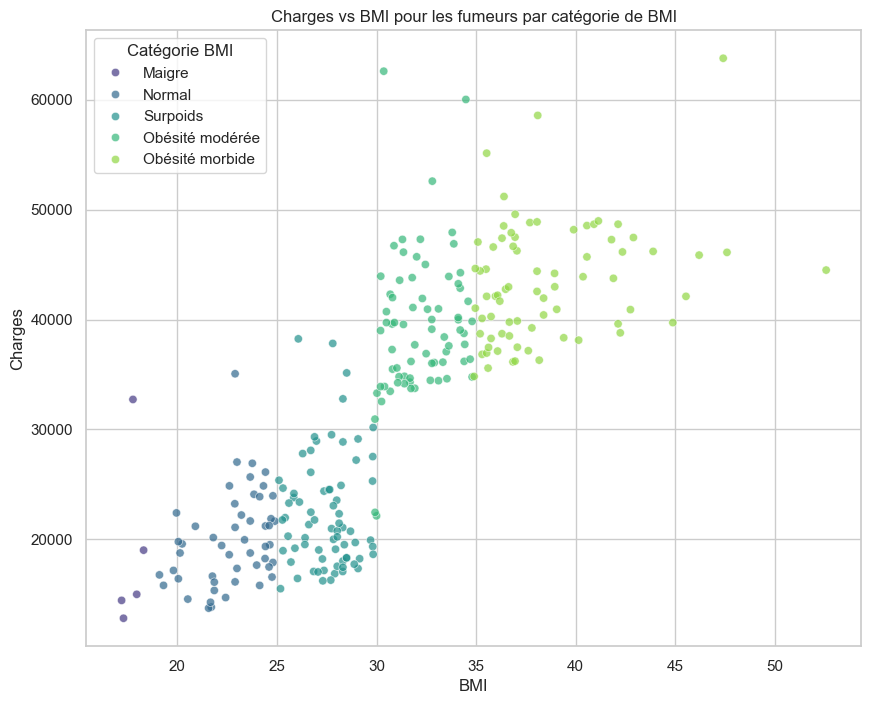

In [201]:
bins = [0, 18.5, 24.9, 29.9, 34.9, 100]
labels = ['Maigre', 'Normal', 'Surpoids', 'Obésité modérée', 'Obésité morbide']

# Ajouter une nouvelle colonne 'bmi_category' avec les catégories définies
df['bmi_category'] = pd.cut(df['bmi'], bins=bins, labels=labels, right=False)

# Filtrer les fumeurs (smoker == 1)
smokers_df = df[df['smoker'] == 1]

# Créer un graphique de dispersion (scatter plot) avec des couleurs par catégorie de BMI
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))

# Tracer le graphique de dispersion avec des couleurs par catégorie de BMI
sns.scatterplot(x='bmi', y='charges', hue='bmi_category', data=smokers_df, alpha=0.7, palette='viridis')

# Ajouter des étiquettes au graphique
plt.title('Charges vs BMI pour les fumeurs par catégorie de BMI')
plt.xlabel('BMI')
plt.ylabel('Charges')

# Afficher la légende
plt.legend(title='Catégorie BMI')

# Afficher le graphique
plt.show()

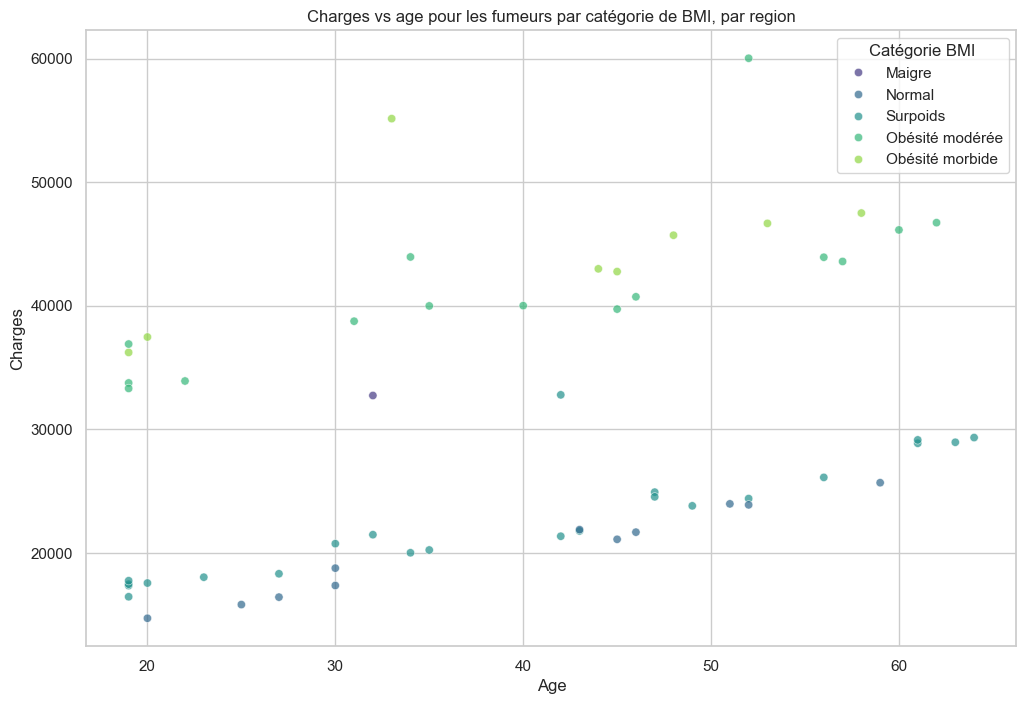

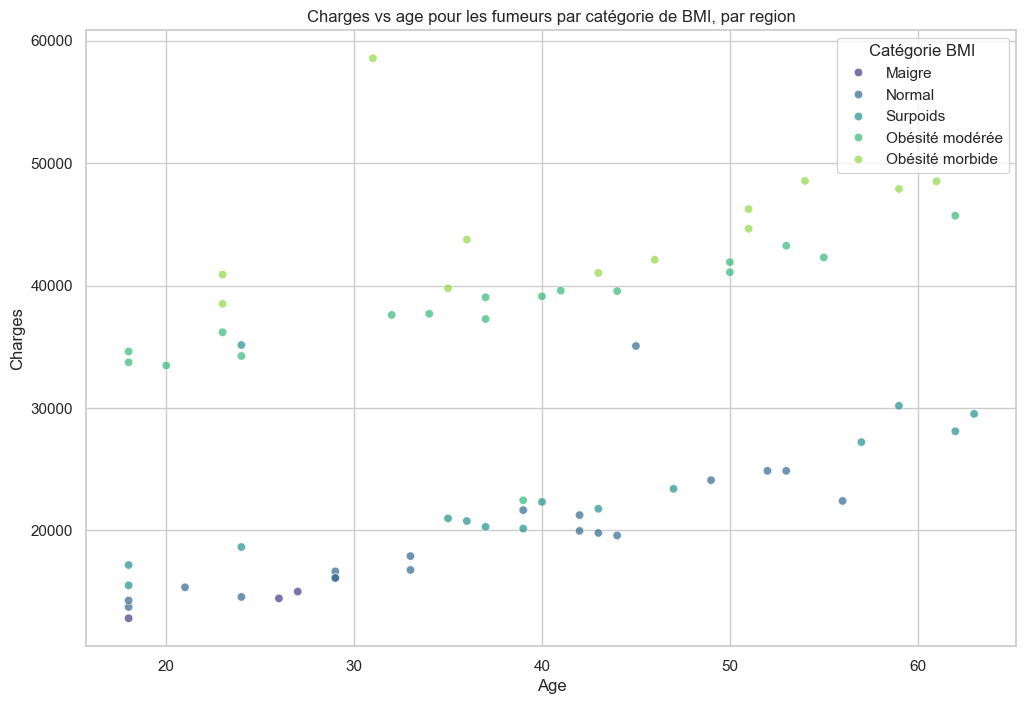

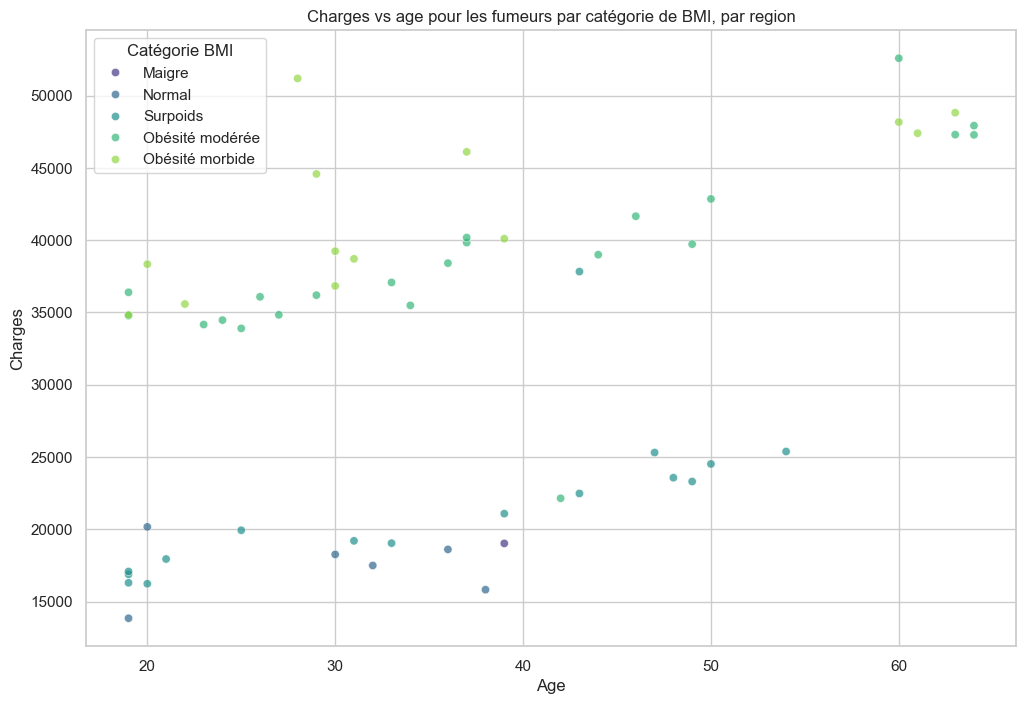

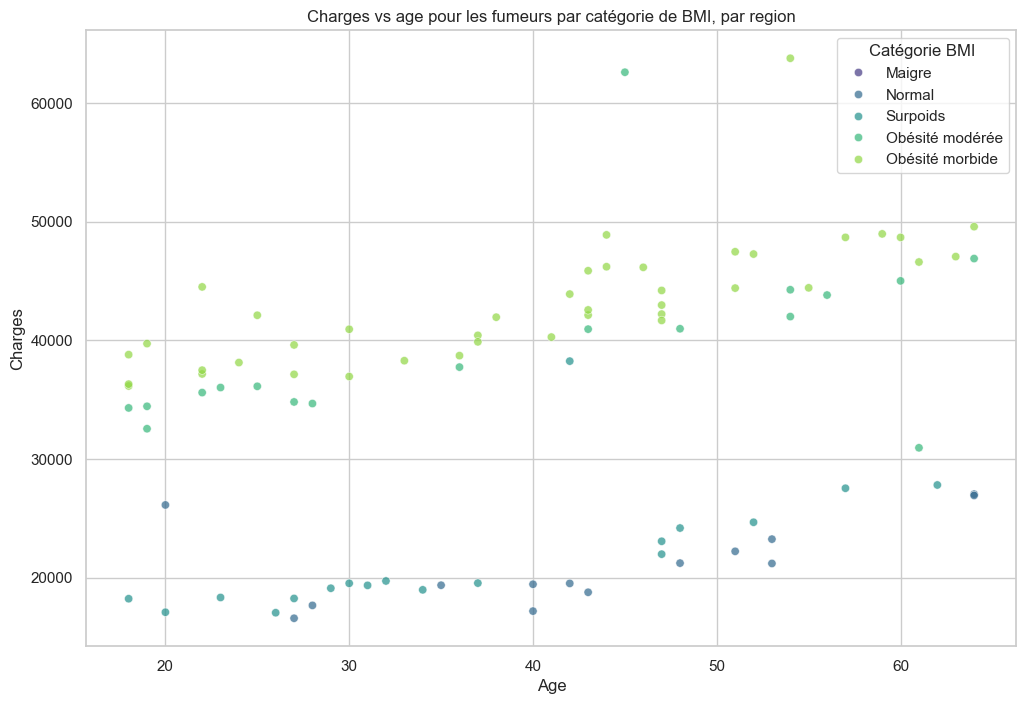

In [202]:
regions = ['NordOuest', 'NordEast', 'SudOuest', 'SudEast']
for region in regions:

    data_subset = df[(df[region] == 1) & (df['smoker'] == 1)]
    bins = [0, 18.5, 24.9, 29.9, 34.9, 100]
    labels = ['Maigre', 'Normal', 'Surpoids', 'Obésité modérée', 'Obésité morbide']
    # Ajouter une nouvelle colonne 'bmi_category' avec les catégories définies
    df['bmi_category'] = pd.cut(df['bmi'], bins=bins, labels=labels, right=False)

    # Filtrer les fumeurs (smoker == 1)
   


    # Créer un graphique de dispersion (scatter plot) avec des couleurs par catégorie de BMI
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 8))

    # Tracer le graphique de dispersion avec des couleurs par catégorie de BMI
    sns.scatterplot(x='age', y='charges', hue='bmi_category', data=data_subset, alpha=0.7, palette='viridis')

    # Ajouter des étiquettes au graphique
    plt.title('Charges vs age pour les fumeurs par catégorie de BMI, par region')
    plt.xlabel('Age')
    plt.ylabel('Charges')

    # Afficher la légende
    plt.legend(title='Catégorie BMI')

    # Afficher le graphique
    plt.show()

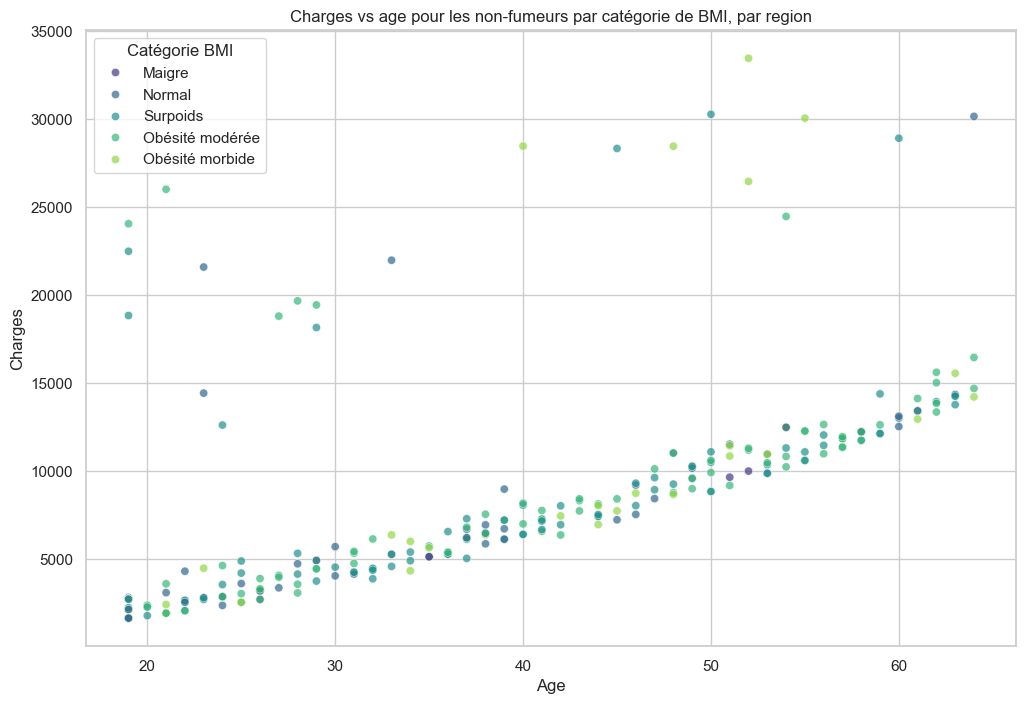

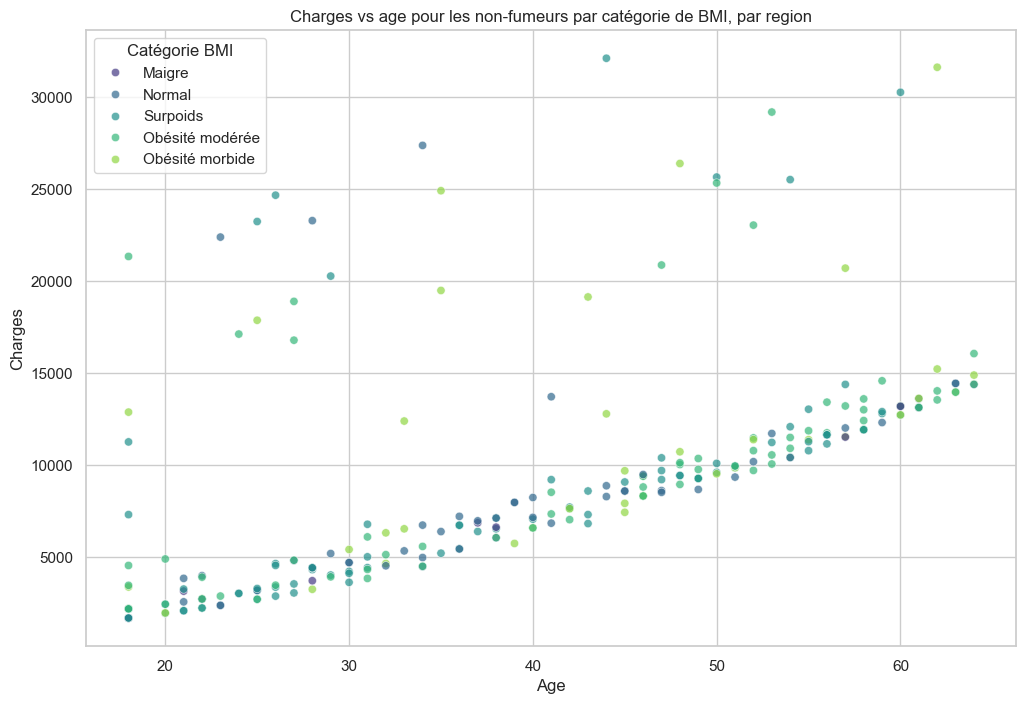

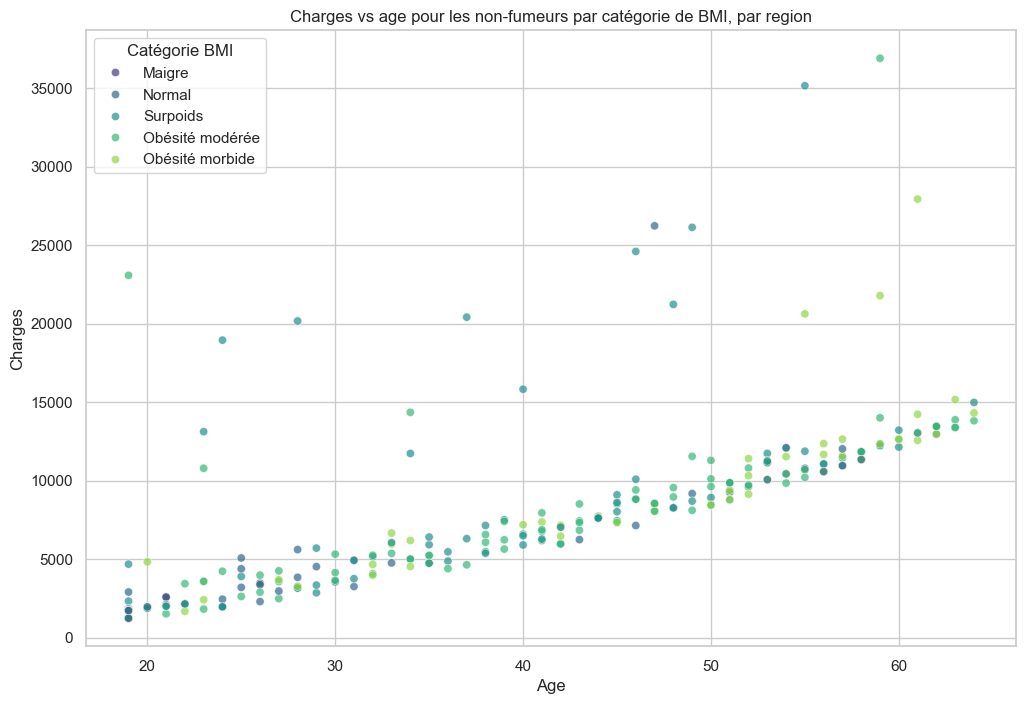

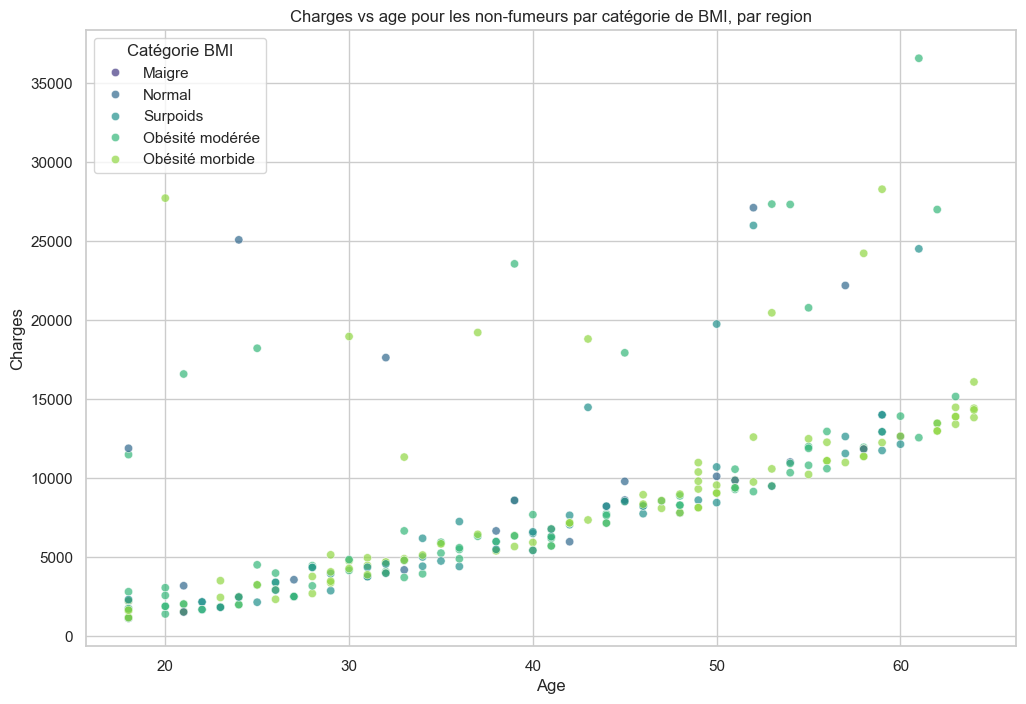

In [203]:
regions = ['NordOuest', 'NordEast', 'SudOuest', 'SudEast']
for region in regions:

    data_subset = df[(df[region] == 1) & (df['smoker'] == 0)]
    bins = [0, 18.5, 24.9, 29.9, 34.9, 100]
    labels = ['Maigre', 'Normal', 'Surpoids', 'Obésité modérée', 'Obésité morbide']
    # Ajouter une nouvelle colonne 'bmi_category' avec les catégories définies
    df['bmi_category'] = pd.cut(df['bmi'], bins=bins, labels=labels, right=False)

    # Filtrer les fumeurs (smoker == 1)
   


    # Créer un graphique de dispersion (scatter plot) avec des couleurs par catégorie de BMI
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 8))

    # Tracer le graphique de dispersion avec des couleurs par catégorie de BMI
    sns.scatterplot(x='age', y='charges', hue='bmi_category', data=data_subset, alpha=0.7, palette='viridis')

    # Ajouter des étiquettes au graphique
    plt.title('Charges vs age pour les non-fumeurs par catégorie de BMI, par region')
    plt.xlabel('Age')
    plt.ylabel('Charges')

    # Afficher la légende
    plt.legend(title='Catégorie BMI')

    # Afficher le graphique
    plt.show()

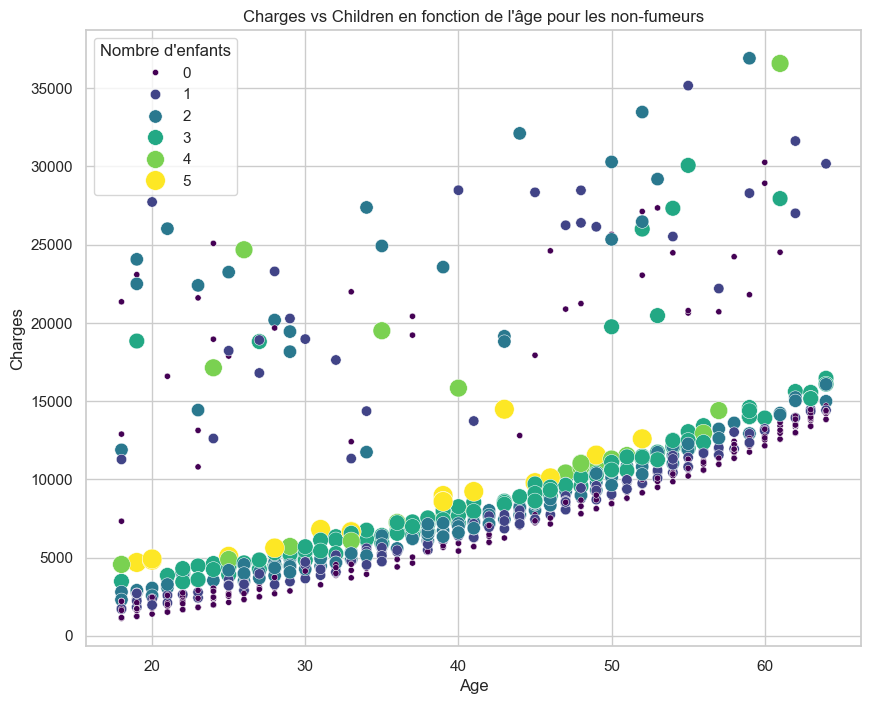

In [204]:
# Filtrer les non-fumeurs (smoker == 0)
non_smokers_df = df[df['smoker'] == 0]

# Créer un graphique de dispersion (scatter plot) avec les axes charges et children, en fonction de l'âge
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))

# Tracer le graphique de dispersion
sns.scatterplot(x='age', y='charges', hue='children', data=non_smokers_df, palette='viridis', size='children', sizes=(20, 200))

# Ajouter des étiquettes au graphique
plt.title('Charges vs Children en fonction de l\'âge pour les non-fumeurs')
plt.xlabel('Age')
plt.ylabel('Charges')

# Afficher la légende
plt.legend(title='Nombre d\'enfants')

# Afficher le graphique
plt.show()

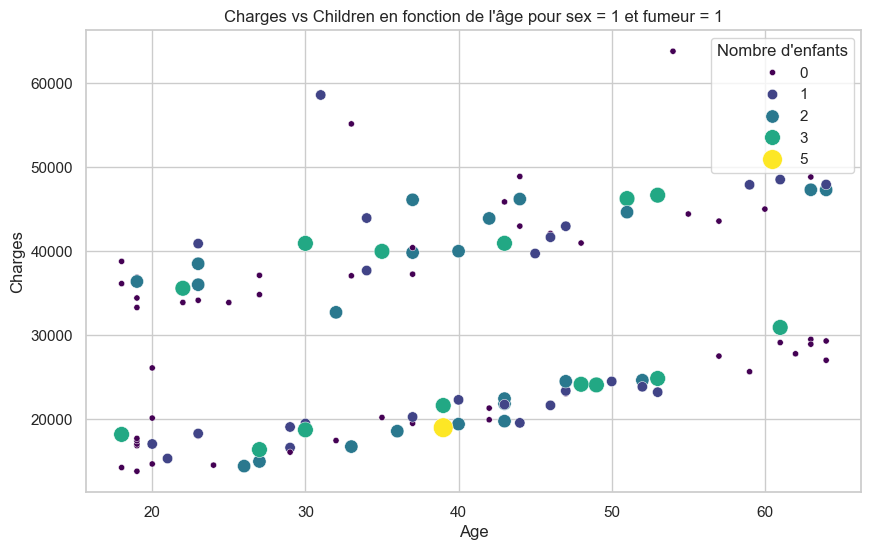

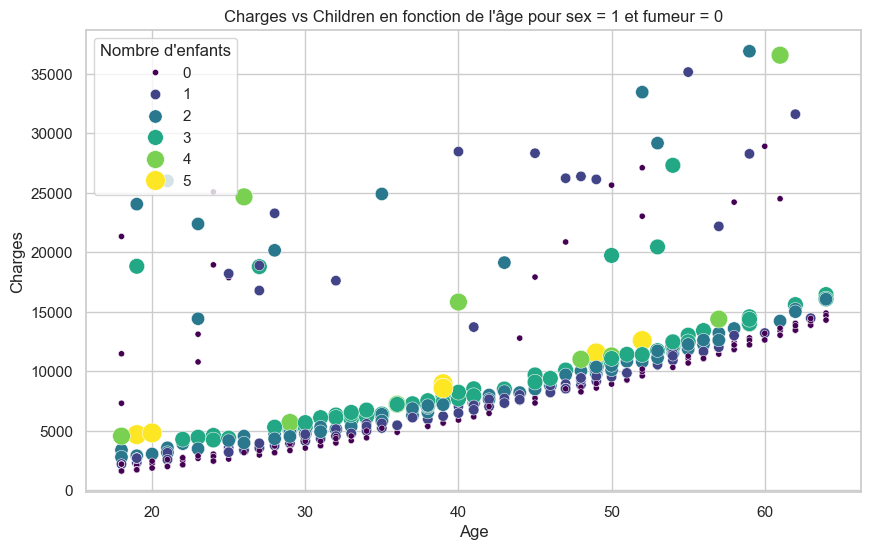

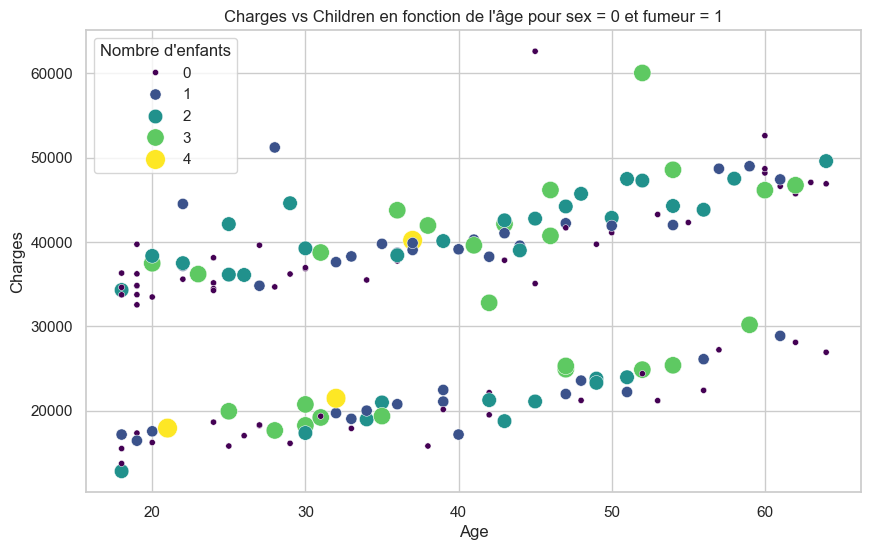

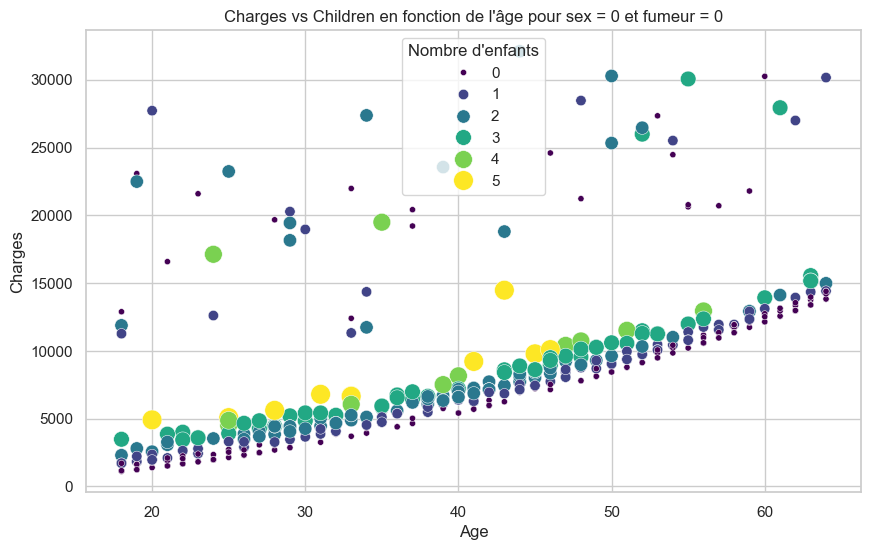

In [205]:
unique_sex_values = df['sex'].unique()
unique_smoker_values = df['smoker'].unique()

# Boucle pour créer un graphique de dispersion pour chaque valeur de 'sex'
for sex_value in unique_sex_values:
    for smoker_value in unique_smoker_values:
        # Filtrer les données pour la valeur de 'sex' actuelle
        data_filter_df = df[(df['sex'] == sex_value) & (df['smoker'] == smoker_value)]

        # Créer un graphique de dispersion
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x='age', y='charges', hue='children', data=data_filter_df, palette='viridis', size='children', sizes=(20, 200))
        plt.title(f'Charges vs Children en fonction de l\'âge pour sex = {sex_value} et fumeur = {smoker_value}')
        plt.xlabel('Age')
        plt.ylabel('Charges')
        plt.legend(title='Nombre d\'enfants')
        plt.show()

In [206]:
selected_features = df[['age','bmi','smoker']]
y_target =df['charges']

print("Dimensions des Caractéristiques(X):", selected_features.shape)
print("Dimensions de la variable cible (y):", y_target.shape)

X = selected_features.values
y = y_target.values

print("Dimensions de X après conversion en Numpy:", X.shape)
print("Dimensions de y après conversion en NumPY:", y.shape)

from sklearn.linear_model import LinearRegression

# Créer le modèle de régression linéaire
model = LinearRegression()

# Ajuster le modèle
model.fit(X, y)

# Afficher les coefficients de régression
print("Coefficients de régression:")
print(model.coef_)

Dimensions des Caractéristiques(X): (1335, 3)
Dimensions de la variable cible (y): (1335,)
Dimensions de X après conversion en Numpy: (1335, 3)
Dimensions de y après conversion en NumPY: (1335,)
Coefficients de régression:
[  260.18205582   321.09496495 23830.77765688]
